In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('housepricedata.csv')

In [4]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [5]:
dataset = df.values

In [6]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [7]:
X = dataset[:,0:10]

In [8]:
Y = dataset[:,10]

In [9]:
from sklearn import preprocessing

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [11]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [14]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [15]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [18]:
Dense(32, activation='relu', input_shape=(10,)),

(<keras.layers.core.dense.Dense at 0x22c20692070>,)

In [19]:
Dense(32, activation='relu'),

(<keras.layers.core.dense.Dense at 0x22c18317be0>,)

In [21]:
Dense(1, activation='sigmoid'),

(<keras.layers.core.dense.Dense at 0x22c20699070>,)

In [22]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
optimizer='sgd'

In [24]:
loss='binary_crossentropy'

In [25]:
metrics=['accuracy']

In [26]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.6923 - accuracy: 0.4922 - val_loss: 0.6838 - val_accuracy: 0.6073
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.5861 - val_loss: 0.6771 - val_accuracy: 0.5890
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6771 - accuracy: 0.5783 - val_loss: 0.6714 - val_accuracy: 0.6027
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.6282 - val_loss: 0.6659 - val_accuracy: 0.5799
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6654 - accuracy: 0.6067 - val_loss: 0.6608 - val_accuracy: 0.6119
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.6458 - val_loss: 0.6555 - val_accuracy: 0.6667
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6541 - accuracy: 0.6967 - val_loss: 0.6501 - val_accuracy: 0.6895
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3165 - accuracy: 0.8826 - val_loss: 0.3568 - val_accuracy: 0.8493
Epoch 60/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8826 - val_loss: 0.3570 - val_accuracy: 0.8539
Epoch 61/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3126 - accuracy: 0.8845 - val_loss: 0.3548 - val_accuracy: 0.8493
Epoch 62/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3111 - accuracy: 0.8816 - val_loss: 0.3537 - val_accuracy: 0.8493
Epoch 63/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3089 - accuracy: 0.8836 - val_loss: 0.3530 - val_accuracy: 0.8493
Epoch 64/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3075 - accuracy: 0.8826 - val_loss: 0.3499 - val_accuracy: 0.8493
Epoch 65/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3059 - accuracy: 0.8826 - val_loss: 0.3491 - val_accuracy: 0.8493
Epoch 

In [27]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 997us/step - loss: 0.2493 - accuracy: 0.8950


0.8949771523475647

In [28]:
import matplotlib.pyplot as plt

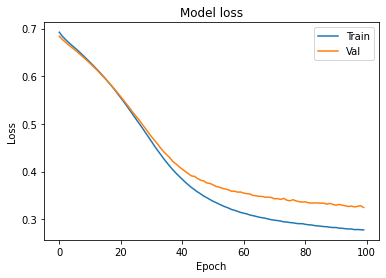

In [29]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

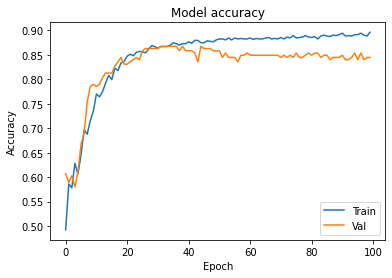

In [32]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [33]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 19ms/step - loss: 0.4551 - accuracy: 0.7798 - val_loss: 0.4621 - val_accuracy: 0.8219
Epoch 2/100
32/32 [==============================] - 1s 16ms/step - loss: 0.3588 - accuracy: 0.8532 - val_loss: 0.4708 - val_accuracy: 0.7626
Epoch 3/100
32/32 [==============================] - 1s 16ms/step - loss: 0.3216 - accuracy: 0.8659 - val_loss: 0.3307 - val_accuracy: 0.8721
Epoch 4/100
32/32 [==============================] - 1s 17ms/step - loss: 0.2959 - accuracy: 0.8738 - val_loss: 0.3070 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 1s 17ms/step - loss: 0.2633 - accuracy: 0.8933 - val_loss: 0.2784 - val_accuracy: 0.9041
Epoch 6/100
32/32 [==============================] - 1s 16ms/step - loss: 0.2669 - accuracy: 0.8933 - val_loss: 0.3667 - val_accuracy: 0.8402
Epoch 7/100
32/32 [==============================] - 1s 17ms/step - loss: 0.2785 - accuracy: 0.8924 - val_loss: 0.3032 - val_accuracy: 0.8813
Epoch 

32/32 [==============================] - 1s 17ms/step - loss: 0.1492 - accuracy: 0.9452 - val_loss: 0.2592 - val_accuracy: 0.8767
Epoch 59/100
32/32 [==============================] - 1s 16ms/step - loss: 0.1409 - accuracy: 0.9403 - val_loss: 0.2615 - val_accuracy: 0.8767
Epoch 60/100
32/32 [==============================] - 1s 16ms/step - loss: 0.1419 - accuracy: 0.9384 - val_loss: 0.3664 - val_accuracy: 0.8447
Epoch 61/100
32/32 [==============================] - 0s 16ms/step - loss: 0.1501 - accuracy: 0.9393 - val_loss: 0.2697 - val_accuracy: 0.8721
Epoch 62/100
32/32 [==============================] - 1s 16ms/step - loss: 0.1505 - accuracy: 0.9403 - val_loss: 0.2698 - val_accuracy: 0.8950
Epoch 63/100
32/32 [==============================] - 1s 16ms/step - loss: 0.1345 - accuracy: 0.9452 - val_loss: 0.2743 - val_accuracy: 0.8813
Epoch 64/100
32/32 [==============================] - 1s 16ms/step - loss: 0.1600 - accuracy: 0.9393 - val_loss: 0.2711 - val_accuracy: 0.8721
Epoch 65/100

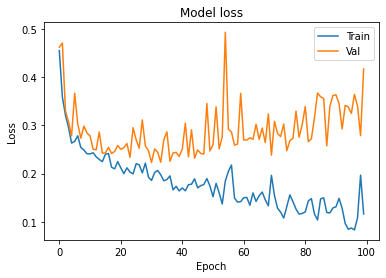

In [34]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

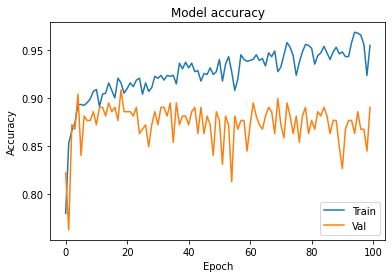

In [35]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [36]:
from keras.layers import Dropout
from keras import regularizers

In [37]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [38]:
kernel_regularizer=regularizers.l2(0.01)

In [39]:
Dropout(0.3),

(<keras.layers.core.dropout.Dropout at 0x22c2bbd5fd0>,)

In [40]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 28ms/step - loss: 14.2712 - accuracy: 0.6018 - val_loss: 3.9354 - val_accuracy: 0.8402
Epoch 2/100
32/32 [==============================] - 1s 24ms/step - loss: 1.6708 - accuracy: 0.8444 - val_loss: 0.7534 - val_accuracy: 0.7854
Epoch 3/100
32/32 [==============================] - 1s 24ms/step - loss: 0.5900 - accuracy: 0.8542 - val_loss: 0.5488 - val_accuracy: 0.8539
Epoch 4/100
32/32 [==============================] - 1s 24ms/step - loss: 0.5549 - accuracy: 0.8503 - val_loss: 0.5439 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 1s 26ms/step - loss: 0.4922 - accuracy: 0.8718 - val_loss: 0.5160 - val_accuracy: 0.8584
Epoch 6/100
32/32 [==============================] - 1s 25ms/step - loss: 0.4786 - accuracy: 0.8699 - val_loss: 0.5092 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 1s 24ms/step - loss: 0.4683 - accuracy: 0.8816 - val_loss: 0.4853 - val_accuracy: 0.8539
Epoch

32/32 [==============================] - 1s 24ms/step - loss: 0.4264 - accuracy: 0.8963 - val_loss: 0.4561 - val_accuracy: 0.8584
Epoch 59/100
32/32 [==============================] - 1s 25ms/step - loss: 0.4295 - accuracy: 0.8865 - val_loss: 0.4493 - val_accuracy: 0.8493
Epoch 60/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4360 - accuracy: 0.8933 - val_loss: 0.4963 - val_accuracy: 0.8402
Epoch 61/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4526 - accuracy: 0.8787 - val_loss: 0.4460 - val_accuracy: 0.8539
Epoch 62/100
32/32 [==============================] - 1s 25ms/step - loss: 0.4367 - accuracy: 0.8816 - val_loss: 0.4648 - val_accuracy: 0.8584
Epoch 63/100
32/32 [==============================] - 1s 25ms/step - loss: 0.4293 - accuracy: 0.8904 - val_loss: 0.4623 - val_accuracy: 0.8584
Epoch 64/100
32/32 [==============================] - 1s 24ms/step - loss: 0.4368 - accuracy: 0.8836 - val_loss: 0.4844 - val_accuracy: 0.8356
Epoch 65/100

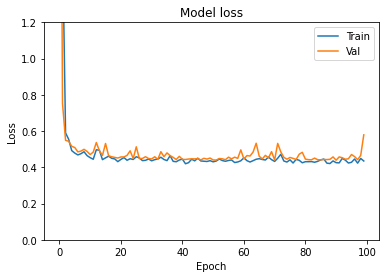

In [41]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

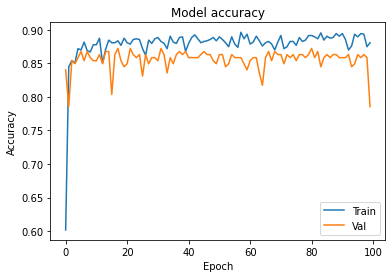

In [42]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()